In [9]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [10]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

## 图像预处理
- 检查图像
- 像素归一化

(60000, 28, 28)


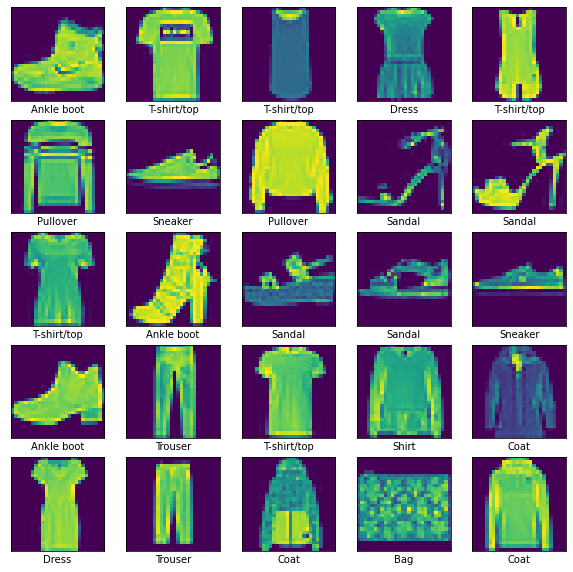

In [14]:
#处理数据集
labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Ankle boot'
]
#检查数据集
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(labels[train_labels[i]])
    
# 数据归一化
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)

## 设计网络层
- 层次网络
> - 第一层的input_shape需要和图像的维度对应，本次图像为`(28*28)`
> - Flatten层，用于图像预处理，将图像转换为一维数组
- compile
> -设置优化器，损失函数，评估标准等

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model=models.load_model('./test.h5')
# model.compile(
#     optimizer='adam',
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

# model.fit(train_images,train_labels,epochs=10)
model.save('./fashion_sequential.h5')

In [7]:
# test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
# print('\nTest accuracy:', test_acc)
# probability_model = keras.Sequential([model, layers.Softmax()])
# predictions = probability_model.predict(test_images)

### 使用con2d


In [8]:

train_images.astype('float32')
test_images.astype('float32')


cnn_model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(1,28, 28)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])

cnn_model.summary()

cnn_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d/Conv2D' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [ ]:
# 卷积处理
from keras import layers
from keras import Model
img_input = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(3, 3, activation='relu')(img_input)
x = layers.MaxPool2D(2)(x)
print(x)